In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import seaborn as sns
import os

In [2]:
df = pd.read_csv('data/water_potability.csv')

#### Opis danych:
1. ```pH value```: 
ph wody.

2. ```Hardness```: 
twardość wody.

3. ```Solids (Total dissolved solids - TDS)```: 
suma substancji rozpuszczonych.

4. ```Chloramines```:
chloraminy.

5. ```Sulfate```: 
siarczany.

6. ```Conductivity```: 
współczynnik filtracji.

7. ```Organic_carbon```: 
węgiel organiczny.

8. ```Trihalomethanes```: 
trihalogenometany.

9. ```Turbidity```: 
nefelometryczna jednostka mętności.

10. ```Potability: ```
zdatność do picia.

### Przetwarzanie danych:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


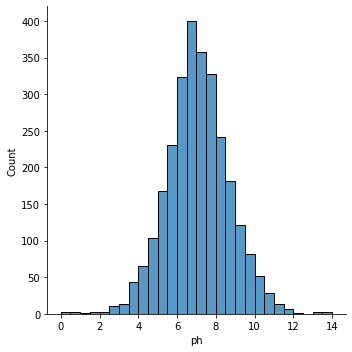

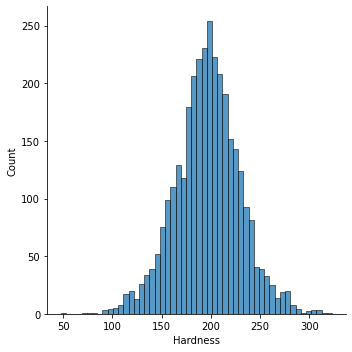

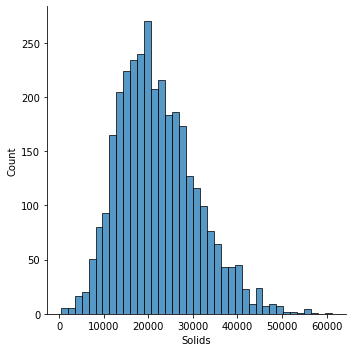

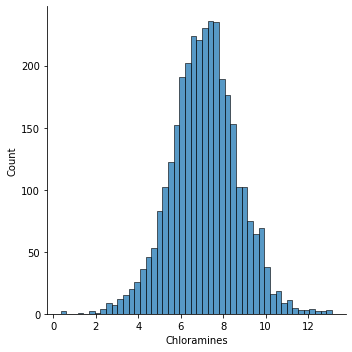

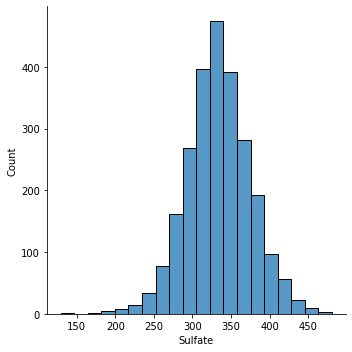

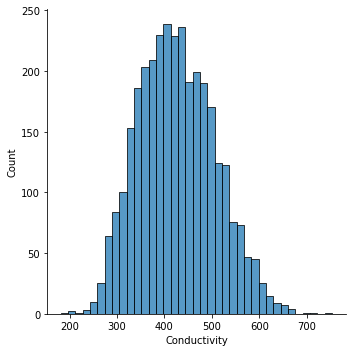

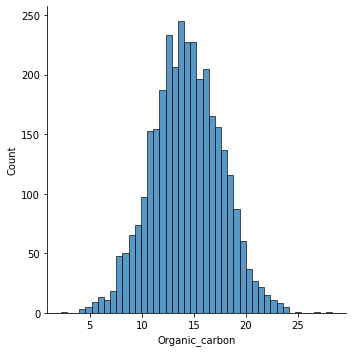

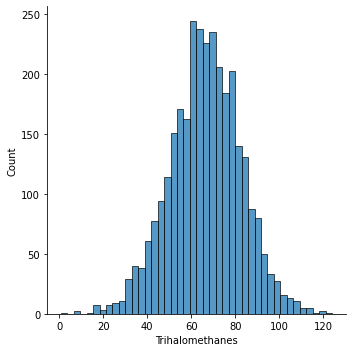

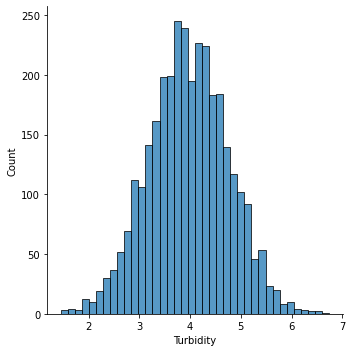

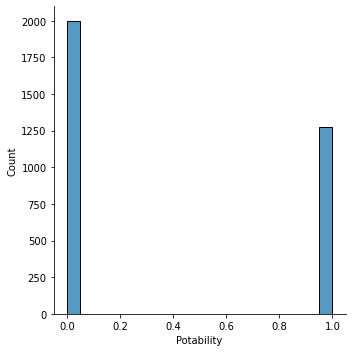

In [5]:
sns.displot(df['ph'], binwidth=0.5)
plt.show()
sns.displot(df['Hardness'])
plt.show()
sns.displot(df['Solids'])
plt.show()
sns.displot(df['Chloramines'])
plt.show()
sns.displot(df['Sulfate'], bins=20)
plt.show()
sns.displot(df['Conductivity'])
plt.show()
sns.displot(df['Organic_carbon'])
plt.show()
sns.displot(df['Trihalomethanes'])
plt.show()
sns.displot(df['Turbidity'])
plt.show()
sns.displot(df['Potability'], bins=20)
plt.show()

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Jak możemy zauważyć w danych najwięcej brakuje Siarczanów, następne jest ph wody, a na końcu mamy trihalogenometany.
W następnej linijce mamy dane odnośnie liczby nulli, gdy usuniemy każdą linijkę, gdzie jest więcej niż 1 null. Z takimi danymi będziemy kontynuować naszą obróbkę.

In [7]:
df.dropna(thresh=df.shape[1]-1).isnull().sum()

ph                 362
Hardness             0
Solids               0
Chloramines          0
Sulfate            638
Conductivity         0
Organic_carbon       0
Trihalomethanes    105
Turbidity            0
Potability           0
dtype: int64

In [8]:
df = df.dropna(thresh=df.shape[1]-1)
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1666.000000,1895.000000,1895.000000,1895.000000,1498.000000,1895.000000,1895.000000,1826.000000,1895.000000,1895.0
mean,7.083138,196.765753,21745.355358,7.088289,334.418842,427.122987,14.360909,66.313525,3.963371,0.0
std,1.682112,31.134297,8534.521609,1.496403,36.702570,80.394403,3.327008,16.068658,0.782945,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.034034,177.723599,15643.924307,6.154966,311.204530,368.825016,12.122987,55.656122,3.442753,0.0
50%,7.038220,197.142637,20791.318981,7.085261,333.336876,422.489596,14.307687,66.363580,3.949220,0.0
75%,8.156849,216.096228,26982.212030,8.052548,356.750665,481.312927,16.639495,77.285822,4.500432,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,27.006707,120.030077,6.739000,0.0


In [9]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1088.000000,1221.000000,1221.000000,1221.000000,980.000000,1221.000000,1221.000000,1185.000000,1221.000000,1221.0
mean,7.071925,196.009050,22474.796555,7.160175,332.600364,426.097738,14.170492,66.523772,3.974858,1.0
std,1.449366,35.545549,9116.885903,1.714955,47.491782,82.350319,3.261062,16.291810,0.782425,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.178172,174.614134,15736.580986,6.084133,301.105261,360.575586,12.038457,55.989796,3.433135,1.0
50%,7.035894,197.191839,21190.154943,7.187022,331.899065,421.417352,14.166602,66.687695,3.965994,1.0
75%,7.929244,218.153477,28174.620516,8.199017,365.946324,485.423179,16.389384,77.373813,4.511384,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


Jak widać, dalej brakuje nam dużo ph i siarczanów, trochę mniej trihalogenomatenów. Średnia i odchylenie standardowe niewiele się różnią, więc wypełnimy brakujące dane ich średnią.

In [10]:
df['ph'].fillna(value = df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(value = df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean(), inplace = True)

In [11]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.078708,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.699670,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.699670,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3273,9.419510,175.762646,33155.578218,7.350233,333.699670,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.699670,402.883113,11.168946,77.488213,4.708658,1


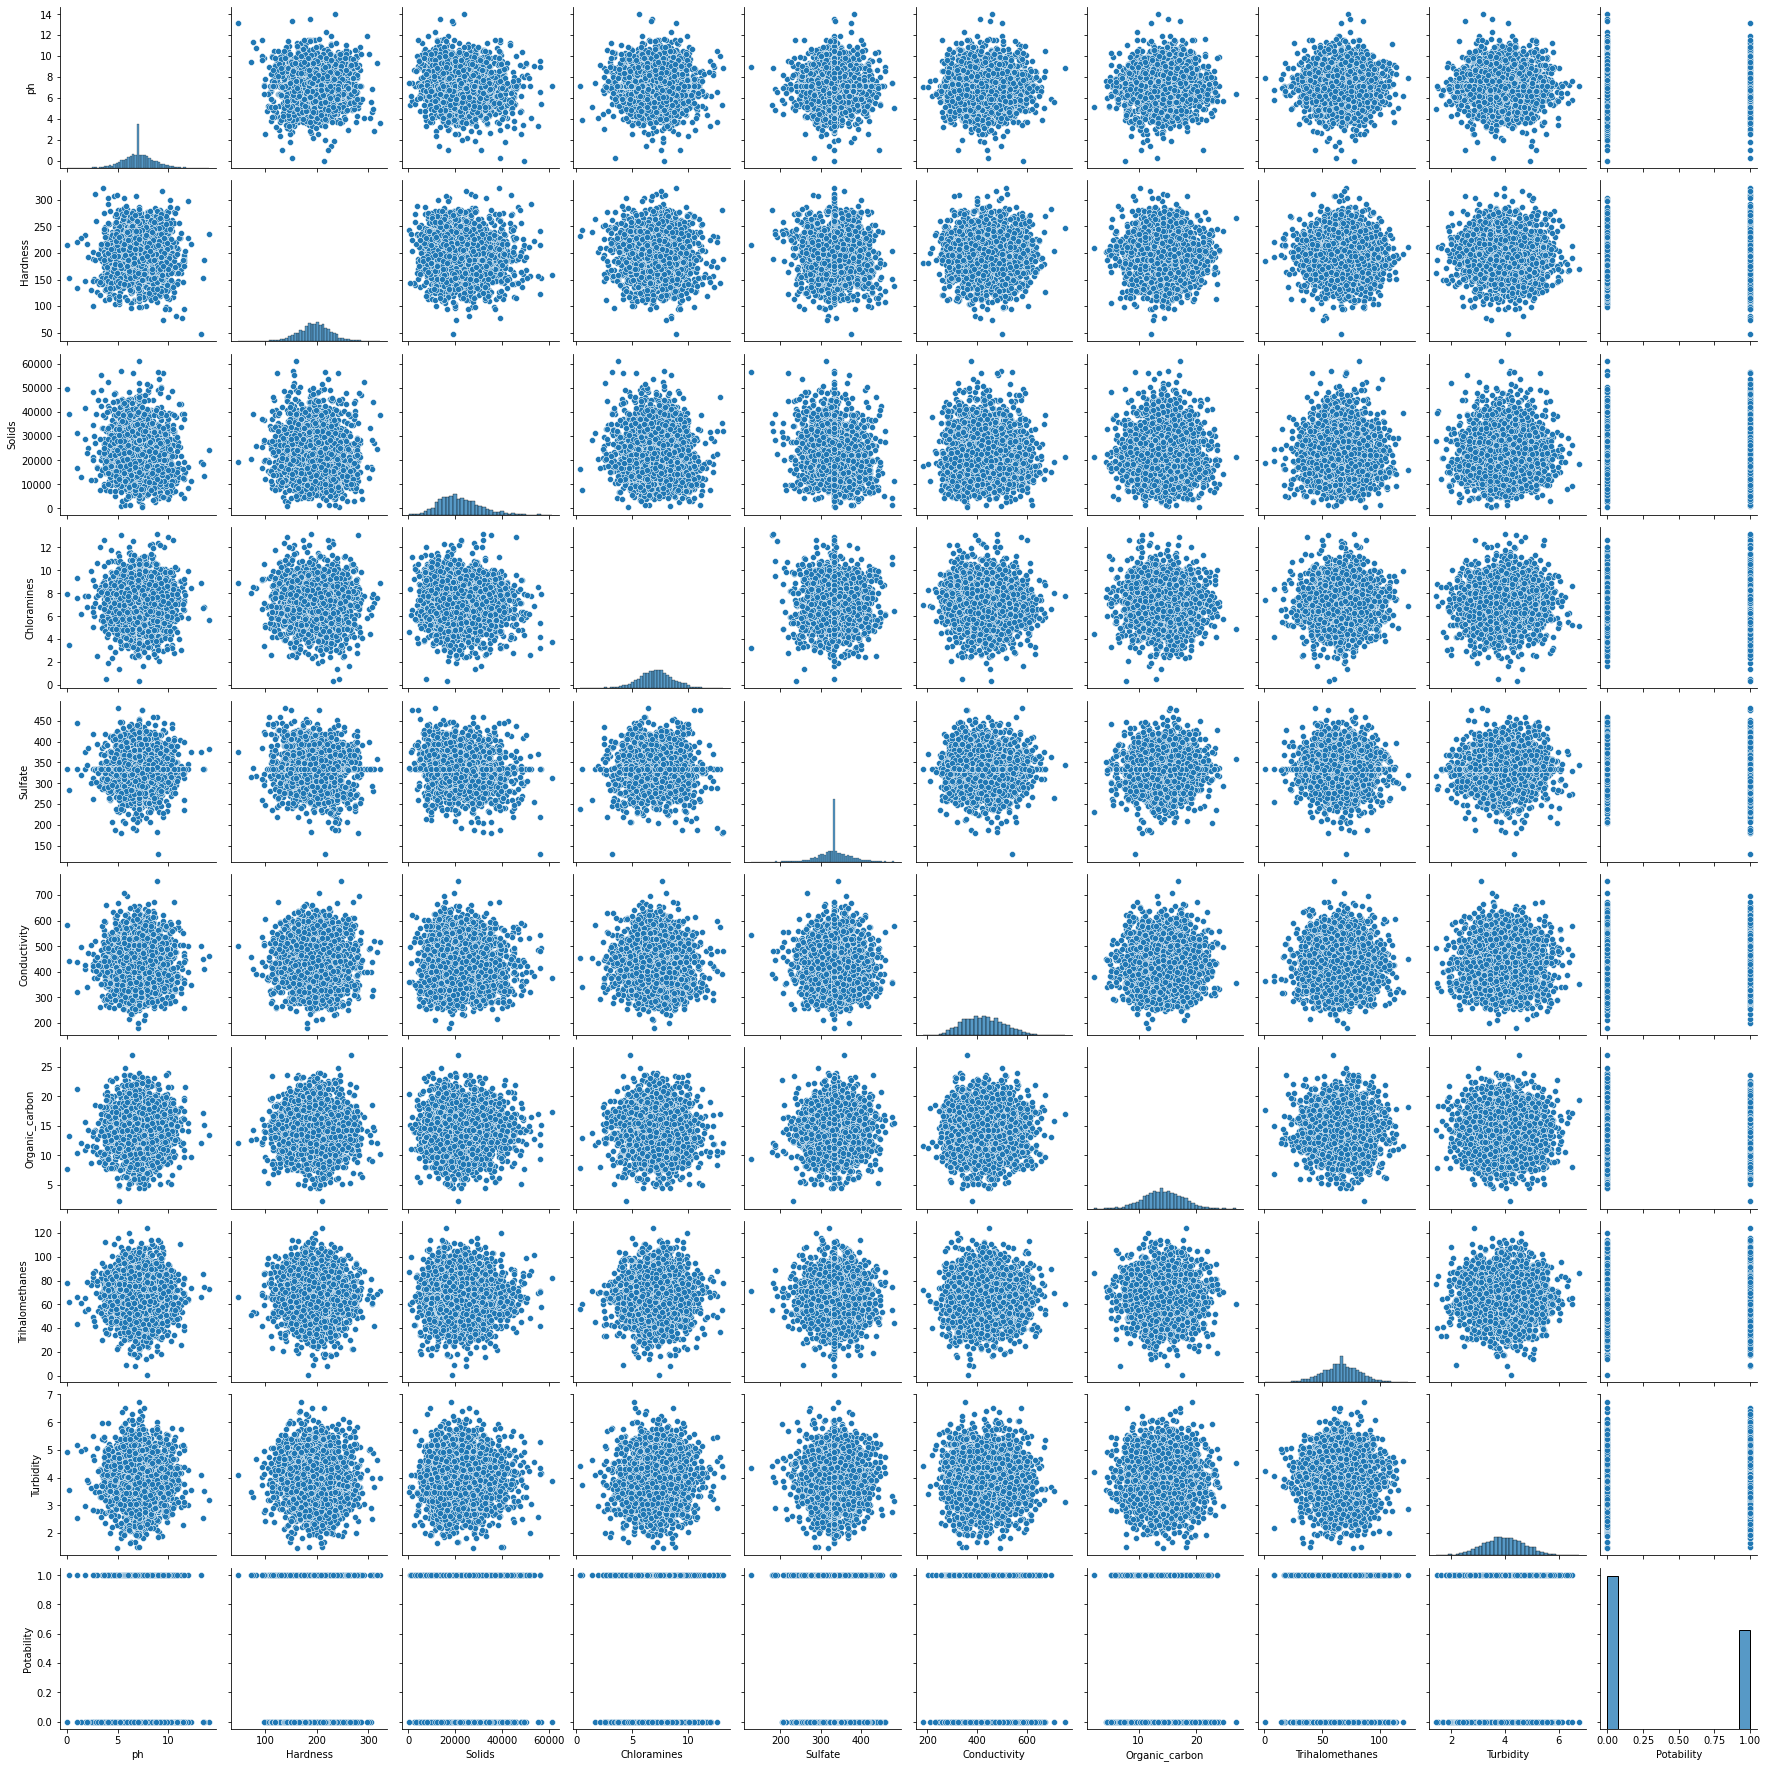

In [12]:
sns.pairplot(df)
plt.show()

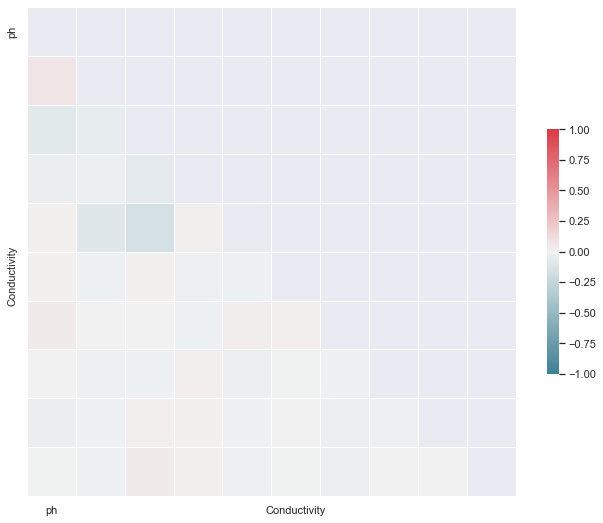

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.077617,-0.083938,-0.032768,0.014568,0.015100,0.040846,0.003074,-0.036503,-0.003238
Hardness,0.077617,1.000000,-0.047507,-0.028438,-0.097964,-0.021404,0.001729,-0.017197,-0.012603,-0.011219
Solids,-0.083938,-0.047507,1.000000,-0.070414,-0.149493,0.012040,0.006699,-0.011183,0.017504,0.040595
Chloramines,-0.032768,-0.028438,-0.070414,1.000000,0.019595,-0.017265,-0.015181,0.022313,0.007965,0.022133
Sulfate,0.014568,-0.097964,-0.149493,0.019595,1.000000,-0.012688,0.026970,-0.026241,-0.009154,-0.019230
Conductivity,0.015100,-0.021404,0.012040,-0.017265,-0.012688,1.000000,0.019468,-0.002662,0.002049,-0.006168
Organic_carbon,0.040846,0.001729,0.006699,-0.015181,0.026970,0.019468,1.000000,-0.012578,-0.027671,-0.028155
Trihalomethanes,0.003074,-0.017197,-0.011183,0.022313,-0.026241,-0.002662,-0.012578,1.000000,-0.021604,0.006256
Turbidity,-0.036503,-0.012603,0.017504,0.007965,-0.009154,0.002049,-0.027671,-0.021604,1.000000,0.007166
Potability,-0.003238,-0.011219,0.040595,0.022133,-0.019230,-0.006168,-0.028155,0.006256,0.007166,1.000000


In [13]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

Jak widzimy powyżej, mamy bardzo niewielkie zależności między danymi.

### Modelowanie danych:

Podzielmy dane na dane testowe i treningowe:


In [14]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != "Potability"]
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2337, 9) (2337,)
(779, 9) (779,)


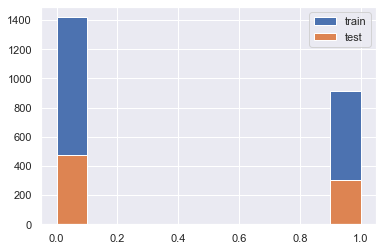

In [15]:
plt.hist(y_train, label="train")
plt.hist(y_test, label="test")
plt.legend()
plt.show()

### Modele proste

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [17]:
pipe_svm_rbf = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid_svm_rbf = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.01, 0.1, 1, 10],
            'classifier__C': [0.1, 1, 10, 100]
}

grid_svm_rbf = GridSearchCV(pipe_svm_rbf, param_grid_svm_rbf, cv=kfold, return_train_score=True, n_jobs=-1)

grid_svm_rbf.fit(X_train, y_train)
grid_svm_rbf.best_params_

{'classifier__C': 1,
 'classifier__gamma': 0.1,
 'preprocessing': StandardScaler()}

In [18]:
pipeline_svm_poly = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))])

param_grid_svm_poly = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.01, 0.1, 1, 10, 100]
}
grid_svm_poly = GridSearchCV(pipeline_svm_poly, param_grid_svm_poly, cv=kfold, return_train_score=True, n_jobs=-1)

grid_svm_poly.fit(X_train, y_train)
grid_svm_poly.best_params_

{'classifier__C': 1, 'preprocessing': StandardScaler()}

In [19]:
pipeline_linear_svm = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(tol=1e-5))])

param_grid_linear_svm = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10]
}

grid_linear_svm = GridSearchCV(pipeline_linear_svm, param_grid_linear_svm, cv=kfold, return_train_score=True, n_jobs=-1)

grid_linear_svm.fit(X_train, y_train)
grid_linear_svm.best_params_

{'classifier__C': 0.001, 'preprocessing': StandardScaler()}

In [20]:
pipeline_logistic_reg = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_logistic_reg = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.01, 0.1, 1, 10]
}

grid_logistic_reg = GridSearchCV(pipeline_logistic_reg, param_grid_logistic_reg, cv=kfold, return_train_score=True, n_jobs=-1) 
grid_logistic_reg.fit(X_train, y_train)
grid_logistic_reg.best_params_

{'classifier__C': 1, 'preprocessing': StandardScaler()}

In [21]:
pipeline_kNeighbors = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid_kNeighbors = {
            'preprocessing': [StandardScaler(), None],
            'classifier__p': [1, 10, 100]
}

grid_kNeighbors = GridSearchCV(pipeline_kNeighbors, param_grid_kNeighbors, cv=kfold, return_train_score=True, n_jobs=-1)

grid_kNeighbors.fit(X_train, y_train)
grid_kNeighbors.best_params_

{'classifier__p': 10, 'preprocessing': StandardScaler()}

In [22]:
pipeline_decision_tree = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_decision_tree = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_decision_tree = GridSearchCV(pipeline_decision_tree, param_grid_decision_tree, cv=kfold, return_train_score=True, n_jobs=-1)

grid_decision_tree.fit(X_train, y_train)
grid_decision_tree.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 100,
 'preprocessing': StandardScaler()}

In [ ]:
pipeline_random_forest = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_random_forest = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 5, 10, 50, 100],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64, 128],
}

grid_random_forest = GridSearchCV(pipeline_random_forest, param_grid_random_forest, cv=kfold, return_train_score=True, n_jobs=-1)

grid_random_forest.fit(X_train, y_train)
grid_random_forest.best_params_


{'classifier__max_leaf_nodes': 64,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

In [24]:
pipeline_adaboost = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_adaboost = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7],
}

grid_adaboost = GridSearchCV(pipeline_adaboost, param_grid_adaboost, cv=kfold, return_train_score=True, n_jobs=-1)

grid_adaboost.fit(X_train, y_train)
grid_adaboost.best_params_

{'classifier__learning_rate': 0.001,
 'classifier__n_estimators': 1,
 'preprocessing': StandardScaler()}

In [25]:
pipeline_gradient_boost = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_gradient_boost = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_gradient_boost = GridSearchCV(pipeline_gradient_boost, param_grid_gradient_boost, cv=kfold, return_train_score=True, n_jobs=-1)

grid_gradient_boost.fit(X_train, y_train)
grid_gradient_boost.best_params_


{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

In [26]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_svm_rbf.best_estimator_))
models.append(('SVM poly', grid_svm_poly.best_estimator_))
models.append(('LinearSVC', grid_linear_svm.best_estimator_))
models.append(('Logistic regression', grid_logistic_reg.best_estimator_))
models.append(('KNeighborsClassifier', grid_kNeighbors.best_estimator_))
models.append(('DecisionTreeClassifier', grid_decision_tree.best_estimator_))
models.append(('RandomForestClassifier', grid_random_forest.best_estimator_))
models.append(('AdaBoostClassifier', grid_adaboost.best_estimator_))
models.append(('GradientBoostingClassifier', grid_gradient_boost.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    prediction = model.predict(X_test)
    print("R^2: {}".format(metrics.precision_score(y_test, prediction)))
    print("recall_score: {}".format( metrics.recall_score(y_test, prediction)))
    print("f1_score: {}".format( metrics.f1_score(y_test, prediction)))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, prediction)))
    precision_score.append(metrics.precision_score(y_test, prediction))
    recall_score.append(metrics.recall_score(y_test, prediction))
    f1_score.append( metrics.f1_score(y_test, prediction))
    accuracy_score.append(metrics.accuracy_score(y_test, prediction))


SVM rbf
R^2: 0.696
recall_score: 0.28618421052631576
f1_score: 0.4055944055944056
accuracy_score: 0.6726572528883183
SVM poly
R^2: 0.6923076923076923
recall_score: 0.05921052631578947
f1_score: 0.10909090909090909
accuracy_score: 0.6225930680359435
LinearSVC
R^2: 0.6666666666666666
recall_score: 0.006578947368421052
f1_score: 0.013029315960912053
accuracy_score: 0.6110397946084724
Logistic regression
R^2: 0.6666666666666666
recall_score: 0.006578947368421052
f1_score: 0.013029315960912053
accuracy_score: 0.6110397946084724
KNeighborsClassifier
R^2: 0.5023474178403756
recall_score: 0.3519736842105263
f1_score: 0.4139264990328821
accuracy_score: 0.6110397946084724
DecisionTreeClassifier
R^2: 0.5042016806722689
recall_score: 0.19736842105263158
f1_score: 0.28368794326241137
accuracy_score: 0.6110397946084724
RandomForestClassifier
R^2: 0.7232142857142857
recall_score: 0.26644736842105265
f1_score: 0.3894230769230769
accuracy_score: 0.6739409499358151
AdaBoostClassifier
R^2: 0.736842105263

In [27]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM poly', 'LinearSVC', 'Logistic regression', 'KNeighborsClassifier',
                                         'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier','GradientBoostingClassifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.696000,0.286184,0.405594,0.672657
1,SVM poly,0.692308,0.059211,0.109091,0.622593
2,LinearSVC,0.666667,0.006579,0.013029,0.611040
3,Logistic regression,0.666667,0.006579,0.013029,0.611040
4,KNeighborsClassifier,0.502347,0.351974,0.413926,0.611040
5,DecisionTreeClassifier,0.504202,0.197368,0.283688,0.611040
6,RandomForestClassifier,0.723214,0.266447,0.389423,0.673941
7,AdaBoostClassifier,0.736842,0.046053,0.086687,0.621309
8,GradientBoostingClassifier,0.603306,0.240132,0.343529,0.641849


### Siec neuronowa

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import History
from keras import backend

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

backend.clear_session()

history = History()

model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(50,activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(10,activation="sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [29]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [30]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32,epochs=400)

Epoch 1/400
74/74 [==============================] - 1s 6ms/step - loss: 0.6914 - accuracy: 0.5794 - val_loss: 0.6690 - val_accuracy: 0.6098
Epoch 2/400
74/74 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5944 - val_loss: 0.6689 - val_accuracy: 0.6098
Epoch 3/400
74/74 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5935 - val_loss: 0.6694 - val_accuracy: 0.6098
Epoch 4/400
74/74 [==============================] - 0s 3ms/step - loss: 0.6752 - accuracy: 0.6021 - val_loss: 0.6690 - val_accuracy: 0.6098
Epoch 5/400
74/74 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.6050 - val_loss: 0.6694 - val_accuracy: 0.6098
Epoch 6/400
74/74 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6059 - val_loss: 0.6696 - val_accuracy: 0.6098
Epoch 7/400
74/74 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6085 - val_loss: 0.6691 - val_accuracy: 0.6098
Epoch 8/400
7

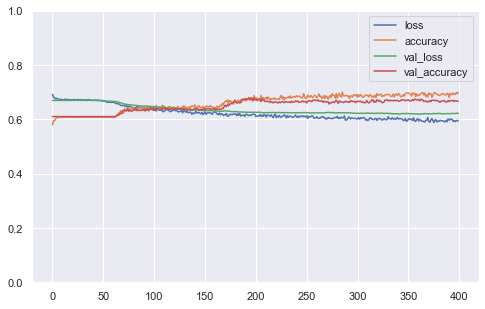

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
test_eval = model.evaluate(X_test_scaled, y_test)
test_eval

25/25 [==============================] - 0s 728us/step - loss: 0.6215 - accuracy: 0.6662


[0.6214960217475891, 0.6662387847900391]

Jak widać model nie jest w stanie zbyt dokładnie przewidzieć jakości wody, można podejrzewać, że jest to spowodowane małymi zależnościami pomiędzy cechami oraz mała ilością danych.